# L²Space Demo: Hilbert Spaces on Intervals

This notebook demonstrates the `L2Space` class, which provides L² Hilbert spaces on interval domains. L² spaces form the foundation for more specialized function spaces like Sobolev spaces.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
import sys

# Remove pygeoinf modules to ensure fresh import
modules_to_remove = [mod for mod in sys.modules.keys() if mod.startswith('pygeoinf')]
for mod in modules_to_remove:
    del sys.modules[mod]

# Import the L2Space and related classes
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.l2_functions import L2Function

# Set up plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

## 1. Creating L²Spaces with Different Basis Types

The API uses `IntervalDomain` objects to specify the geometric domain. L²Spaces focus on function approximation and inner products, while boundary conditions are handled at the Sobolev space level for PDE applications.

In [ ]:
print("=== Creating L²Spaces with Different Basis Types ===")
print()

# 1. Fourier basis (naturally periodic)
fourier_domain = IntervalDomain(0, 2*np.pi)
fourier_space = L2Space(8, fourier_domain, basis_type='fourier')

print(f"1. Fourier L²Space:")
print(f"   Domain: {fourier_space.function_domain}")
print(f"   Dimension: {fourier_space.dim}")
print(f"   Basis type: {fourier_space.basis_type}")
print(f"   Domain interval: [{fourier_space.function_domain.a}, {fourier_space.function_domain.b}]")
print()

# 2. Hat functions (piecewise linear)
hat_domain = IntervalDomain(0, 1)
hat_space = L2Space(10, hat_domain, basis_type='hat')

print(f"2. Hat Function L²Space:")
print(f"   Domain: {hat_space.function_domain}")
print(f"   Dimension: {hat_space.dim}")
print(f"   Basis type: {hat_space.basis_type}")
print()

# 3. Homogeneous hat functions (zero at boundaries)
homogeneous_domain = IntervalDomain(-1, 1)
homogeneous_space = L2Space(8, homogeneous_domain, basis_type='hat_homogeneous')

print(f"3. Homogeneous Hat Function L²Space:")
print(f"   Domain: {homogeneous_space.function_domain}")
print(f"   Dimension: {homogeneous_space.dim}")
print(f"   Basis type: {homogeneous_space.basis_type}")
print()

print("✓ All L²Spaces created successfully!")

=== Creating L²Spaces with Different Basis Types ===

1. Fourier L²Space:
   Domain: [0.0, 6.283185307179586]
   Dimension: 8
   Basis type: fourier
   Domain interval: [0.0, 6.283185307179586]

2. Hat Function L²Space:
   Domain: [0.0, 1.0]
   Dimension: 10
   Basis type: hat

3. Homogeneous Hat Function L²Space:
   Domain: [-1.0, 1.0]
   Dimension: 8
   Basis type: hat_homogeneous

✓ All L²Spaces created successfully!
✓ L²Spaces focus on function approximation and inner products!


## 2. Basis Types and Function Approximation

Different basis types are optimized for different kinds of functions. L²Spaces provide the foundation for function approximation through orthogonal projections.

In [33]:
print("=== Different Basis Types for Function Approximation ===")
print()

# Create different domains for demonstration
domain_2pi = IntervalDomain(0, 2*np.pi, name="Periodic Domain")
domain_unit = IntervalDomain(0, 1, name="Unit Interval")
domain_symmetric = IntervalDomain(-1, 1, name="Symmetric Interval")

print("Creating domains:")
print(f"   {domain_2pi}")
print(f"   {domain_unit}")
print(f"   {domain_symmetric}")
print()

# Different basis types for different approximation needs
basis_combinations = [
    ("Fourier basis", domain_2pi, 'fourier', "Best for periodic/smooth functions"),
    ("Hat functions", domain_unit, 'hat', "Good for general piecewise approximation"),
    ("Homogeneous hats", domain_symmetric, 'hat_homogeneous', "Zero at boundaries, good for interior approximation"),
]

print("Creating L²Spaces with different basis types:")
spaces = []
for name, domain, basis_type, description in basis_combinations:
    try:
        space = L2Space(8, domain, basis_type=basis_type)
        spaces.append(space)
        print(f"   ✓ {name}: dim={space.dim} - {description}")
    except ValueError as e:
        print(f"   ✗ {name}: {e}")

print()

# Demonstrate basis function properties
print("Basis function properties:")
for i, (space, (name, _, _, _)) in enumerate(zip(spaces, basis_combinations)):
    sample_basis = space.get_basis_function(1)  # Get second basis function
    print(f"   {name}: φ_1 = {sample_basis.name}")

print()
print("✓ Each basis type optimized for different function classes!")
print("✓ L²Spaces provide foundation for function approximation!")

=== Different Basis Types for Function Approximation ===

Creating domains:
   [0.0, 6.283185307179586]
   [0.0, 1.0]
   [-1.0, 1.0]

Creating L²Spaces with different basis types:
   ✓ Fourier basis: dim=8 - Best for periodic/smooth functions
   ✓ Hat functions: dim=8 - Good for general piecewise approximation
   ✓ Homogeneous hats: dim=8 - Zero at boundaries, good for interior approximation

Basis function properties:
   Fourier basis: φ_1 = cos_1
   Hat functions: φ_1 = φ_1
   Homogeneous hats: φ_1 = φ_1

✓ Each basis type optimized for different function classes!
✓ L²Spaces provide foundation for function approximation!


## 3. Basis Function Visualization

Let's visualize the different types of basis functions and see their characteristics for function approximation.

=== Visualizing Basis Functions ===


/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:250: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


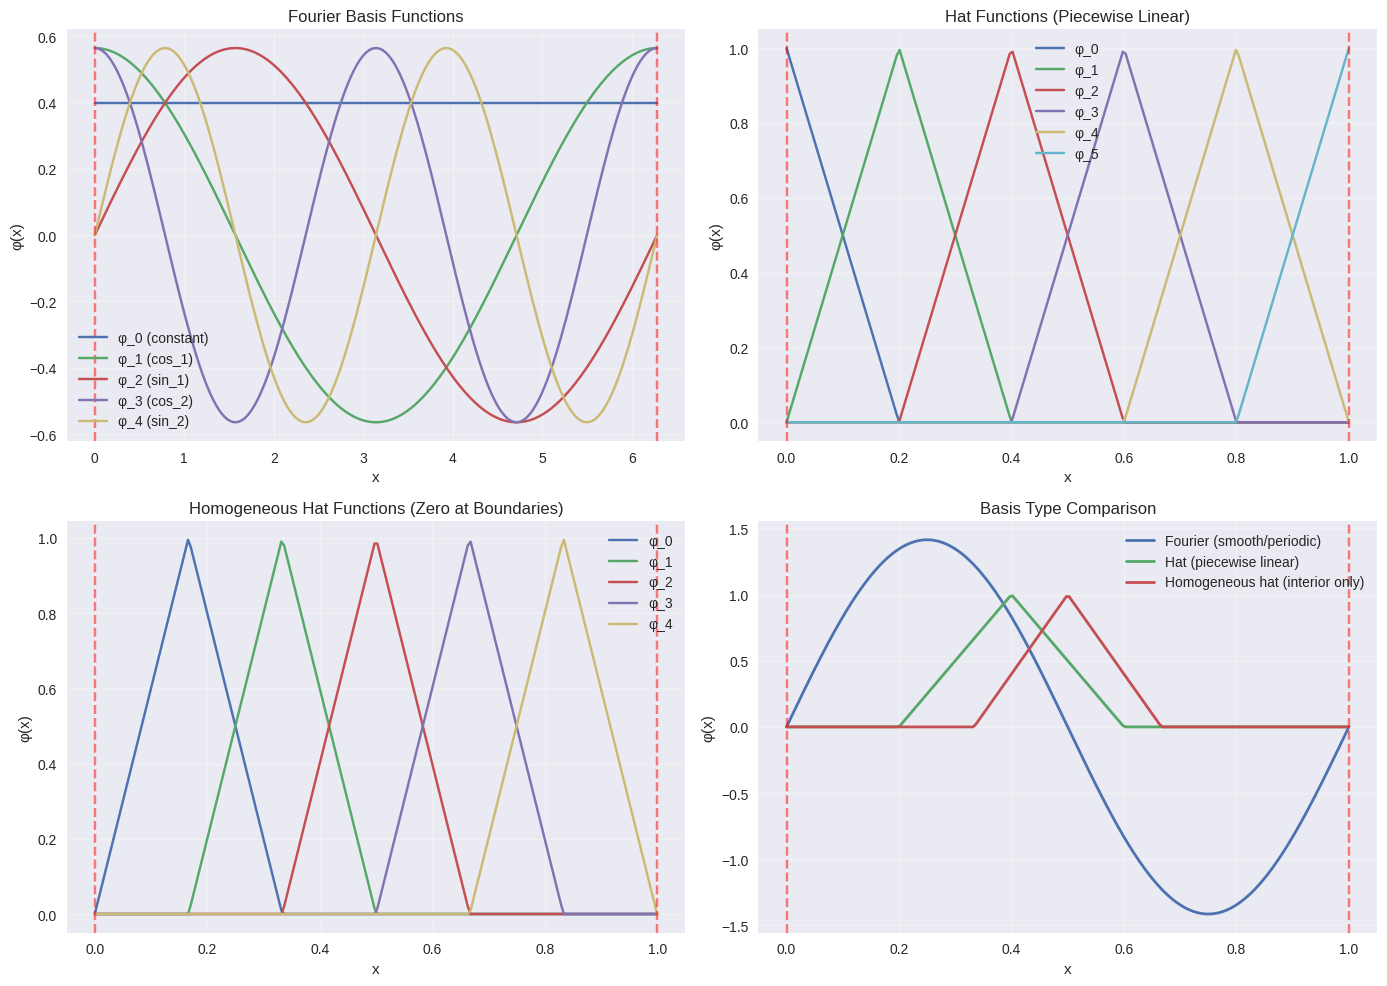

In [34]:
print("=== Visualizing Basis Functions ===")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Fourier basis functions
ax = axes[0, 0]
fourier_domain = IntervalDomain(0, 2*np.pi)
fourier_space = L2Space(6, fourier_domain, basis_type='fourier')

x = np.linspace(0, 2*np.pi, 200)
for i in range(min(5, fourier_space.dim)):
    basis_func = fourier_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i} ({basis_func.name})')

ax.set_title('Fourier Basis Functions')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5, label='Domain boundaries')
ax.axvline(2*np.pi, color='red', linestyle='--', alpha=0.5)

# 2. Hat functions
ax = axes[0, 1]
hat_domain = IntervalDomain(0, 1)
hat_space = L2Space(6, hat_domain, basis_type='hat')

x = np.linspace(0, 1, 200)
for i in range(min(6, hat_space.dim)):
    basis_func = hat_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Hat Functions (Piecewise Linear)')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 3. Homogeneous hat functions
ax = axes[1, 0]
homogeneous_domain = IntervalDomain(0, 1)
homogeneous_space = L2Space(5, homogeneous_domain, basis_type='hat_homogeneous')

x = np.linspace(0, 1, 200)
for i in range(homogeneous_space.dim):
    basis_func = homogeneous_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Homogeneous Hat Functions (Zero at Boundaries)')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 4. Comparison of basis types
ax = axes[1, 1]

# Sample one function from each type
x = np.linspace(0, 1, 200)

# Fourier on [0,1]
fourier_test = L2Space(4, IntervalDomain(0, 1), basis_type='fourier')
fourier_func = fourier_test.get_basis_function(2)  # A sine function
y_fourier = np.array([fourier_func.evaluate(xi) for xi in x])
ax.plot(x, y_fourier, label='Fourier (smooth/periodic)', linewidth=2)

# Hat function
hat_func = hat_space.get_basis_function(2)  # Interior hat function
y_hat = np.array([hat_func.evaluate(xi) for xi in x])
ax.plot(x, y_hat, label='Hat (piecewise linear)', linewidth=2)

# Homogeneous hat function
homog_func = homogeneous_space.get_basis_function(2)
y_homog = np.array([homog_func.evaluate(xi) for xi in x])
ax.plot(x, y_homog, label='Homogeneous hat (interior only)', linewidth=2)

ax.set_title('Basis Type Comparison')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 4. L² Inner Products and Gram Matrix

The L² inner product is computed via numerical integration: ⟨u,v⟩_L² = ∫_a^b u(x)v(x) dx

=== L² Inner Products and Gram Matrix ===

L²Space: 5-dimensional Fourier space on [0.0, 6.283185307179586]

Manual inner product computations:
   ⟨φ_0, φ_0⟩_L² = 1.000000
   ⟨φ_0, φ_1⟩_L² = 0.000000
   ⟨φ_0, φ_2⟩_L² = -0.000000
   ⟨φ_1, φ_1⟩_L² = 1.000000
   ⟨φ_1, φ_2⟩_L² = -0.000000
   ⟨φ_2, φ_2⟩_L² = 1.000000

Full Gram matrix (automatically computed and cached):
Gram matrix shape: (5, 5)
Gram matrix:
[[ 1.00000000e+00  0.00000000e+00 -5.55111512e-17 -1.02348685e-16
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.77555756e-17 -2.77555756e-17
  -5.55111512e-17]
 [-5.55111512e-17 -2.77555756e-17  1.00000000e+00  2.77555756e-17
  -2.77555756e-17]
 [-1.02348685e-16 -2.77555756e-17  2.77555756e-17  1.00000000e+00
  -2.23345648e-17]
 [ 0.00000000e+00 -5.55111512e-17 -2.77555756e-17 -2.23345648e-17
   1.00000000e+00]]

Properties of the Gram matrix:
   Symmetric: True
   Positive definite: True
   Condition number: 1.00e+00


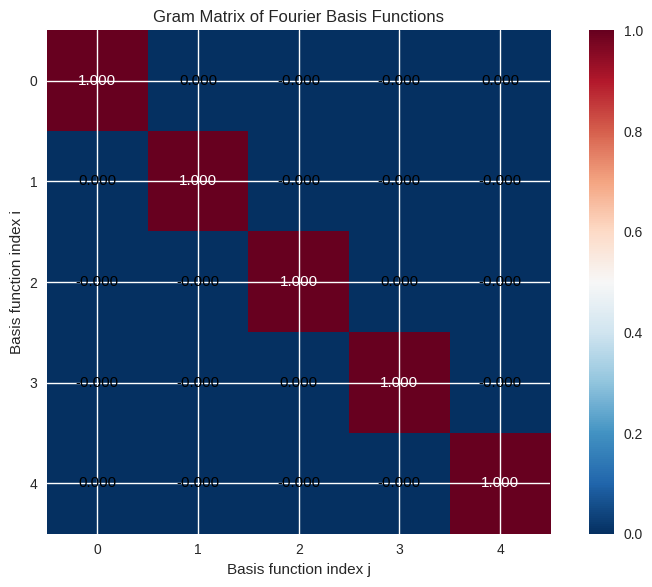

✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity


In [35]:
print("=== L² Inner Products and Gram Matrix ===")
print()

# Create a small Fourier space for demonstration
domain = IntervalDomain(0, 2*np.pi)
space = L2Space(5, domain, basis_type='fourier')

print(f"L²Space: {space.dim}-dimensional Fourier space on [{space.function_domain.a}, {space.function_domain.b}]")
print()

# Compute some inner products manually
print("Manual inner product computations:")
for i in range(3):
    for j in range(i, 3):
        basis_i = space.get_basis_function(i)
        basis_j = space.get_basis_function(j)
        inner_prod = space.inner_product(basis_i, basis_j)
        print(f"   ⟨φ_{i}, φ_{j}⟩_L² = {inner_prod:.6f}")

print()
print("Full Gram matrix (automatically computed and cached):")
gram_matrix = space.gram_matrix
print(f"Gram matrix shape: {gram_matrix.shape}")
print("Gram matrix:")
print(gram_matrix)

print()
print("Properties of the Gram matrix:")
print(f"   Symmetric: {np.allclose(gram_matrix, gram_matrix.T)}")
print(f"   Positive definite: {np.all(np.linalg.eigvals(gram_matrix) > 0)}")
print(f"   Condition number: {np.linalg.cond(gram_matrix):.2e}")

# Visualize the Gram matrix
plt.figure(figsize=(8, 6))
im = plt.imshow(gram_matrix, cmap='RdBu_r', aspect='equal')
plt.colorbar(im)
plt.title('Gram Matrix of Fourier Basis Functions')
plt.xlabel('Basis function index j')
plt.ylabel('Basis function index i')

# Add text annotations
for i in range(gram_matrix.shape[0]):
    for j in range(gram_matrix.shape[1]):
        plt.text(j, i, f'{gram_matrix[i,j]:.3f}', ha='center', va='center',
                color='white' if abs(gram_matrix[i,j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

print("✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity")

## 5. Function Projection and Approximation

One of the key features of L²spaces is the ability to project arbitrary functions onto finite-dimensional subspaces.

=== Function Projection and Approximation ===

Projecting onto 4-dimensional Fourier space...
   L² approximation error: 0.676296
Projecting onto 8-dimensional Fourier space...
   L² approximation error: 0.354863
Projecting onto 16-dimensional Fourier space...
   L² approximation error: 0.040885
   L² approximation error: 0.676296
Projecting onto 8-dimensional Fourier space...
   L² approximation error: 0.354863
Projecting onto 16-dimensional Fourier space...
   L² approximation error: 0.040885


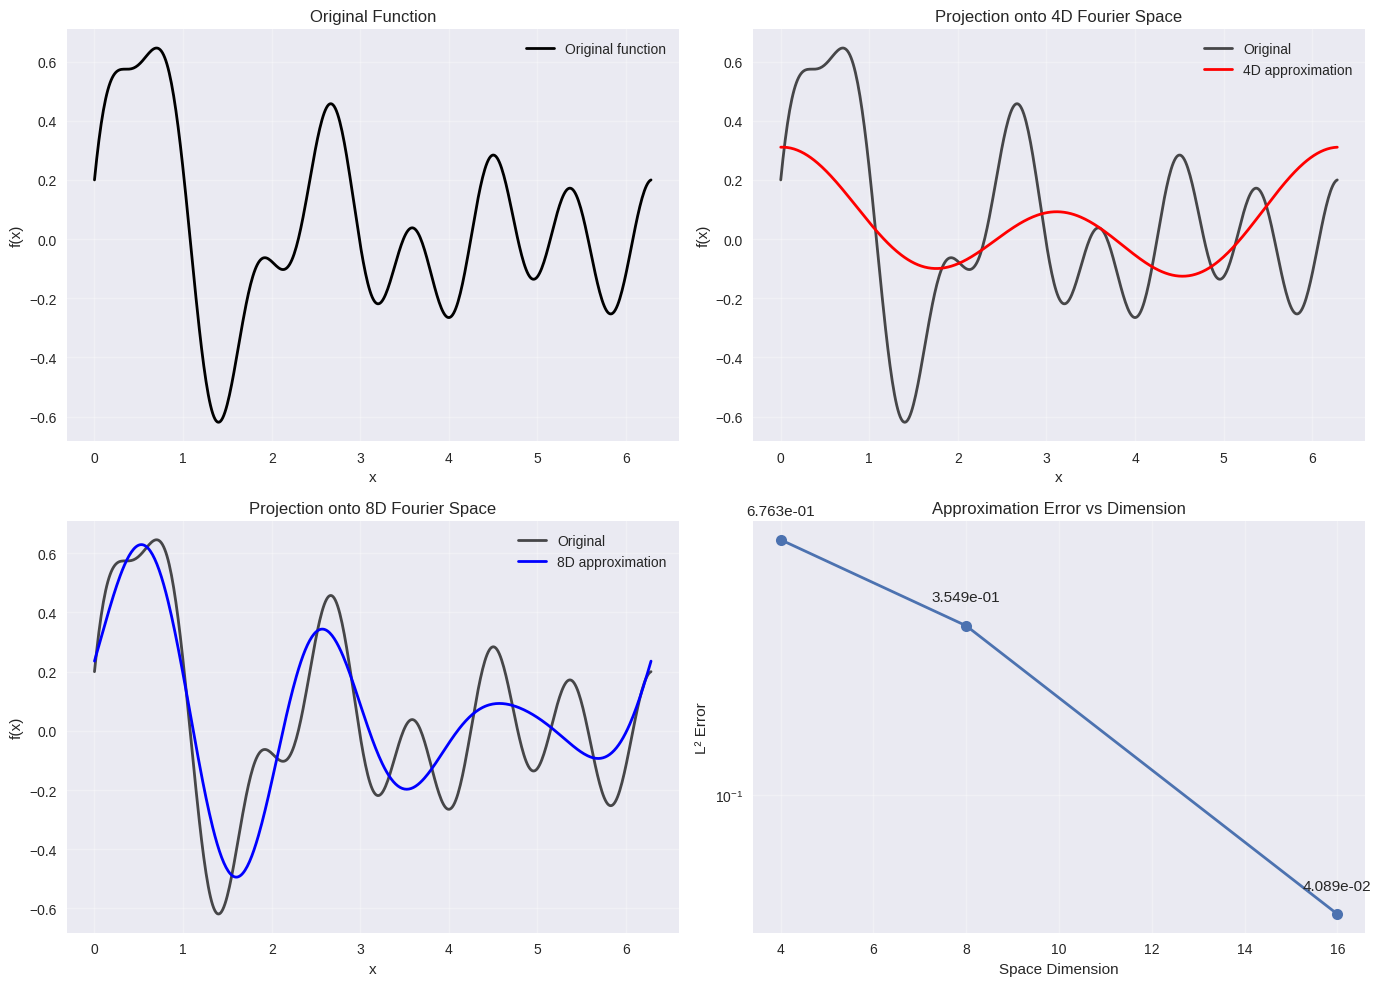


Projection results:
   4D space: L² error = 0.676296
   8D space: L² error = 0.354863
   16D space: L² error = 0.040885

✓ Higher-dimensional spaces provide better approximations!
✓ Function projection is a key feature of L² spaces!


In [36]:
print("=== Function Projection and Approximation ===")
print()

# Define a test function to approximate
def test_function(x):
    return np.sin(3*x) * np.exp(-0.5*x) + 0.2*np.cos(7*x)

# Create L²spaces with different dimensions
domain = IntervalDomain(0, 2*np.pi)
dimensions = [4, 8, 16]
spaces = [L2Space(dim, domain, basis_type='fourier') for dim in dimensions]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x_fine = np.linspace(0, 2*np.pi, 500)
y_true = test_function(x_fine)

# Plot original function
ax = axes[0, 0]
ax.plot(x_fine, y_true, 'k-', linewidth=2, label='Original function')
ax.set_title('Original Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# Plot approximations for different dimensions
colors = ['red', 'blue', 'green']
errors = []

for i, (space, color) in enumerate(zip(spaces, colors)):
    print(f"Projecting onto {space.dim}-dimensional Fourier space...")

    # Project the function
    projected_func = space.project(test_function)

    # Evaluate the projection
    y_approx = np.array([projected_func.evaluate(xi) for xi in x_fine])

    # Compute L² error (approximately) - using trapezoid instead of deprecated trapz
    error = np.sqrt(np.trapezoid((y_true - y_approx)**2, x_fine))
    errors.append(error)

    print(f"   L² approximation error: {error:.6f}")

    # Plot the approximation
    if i < 2:
        ax = axes[0, 1] if i == 0 else axes[1, 0]
        ax.plot(x_fine, y_true, 'k-', linewidth=2, alpha=0.7, label='Original')
        ax.plot(x_fine, y_approx, color=color, linewidth=2,
               label=f'{space.dim}D approximation')
        ax.set_title(f'Projection onto {space.dim}D Fourier Space')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        ax.legend()

# Error convergence plot
ax = axes[1, 1]
ax.semilogy(dimensions, errors, 'o-', linewidth=2, markersize=8)
ax.set_title('Approximation Error vs Dimension')
ax.set_xlabel('Space Dimension')
ax.set_ylabel('L² Error')
ax.grid(True, alpha=0.3)

# Add error values as text
for dim, error in zip(dimensions, errors):
    ax.text(dim, error*1.2, f'{error:.3e}', ha='center')

plt.tight_layout()
plt.show()

print()
print("Projection results:")
for dim, error in zip(dimensions, errors):
    print(f"   {dim}D space: L² error = {error:.6f}")

print()
print("✓ Higher-dimensional spaces provide better approximations!")
print("✓ Function projection is a key feature of L² spaces!")

## 6. Coefficient Representation and Linear Algebra

Functions in finite-dimensional L²spaces can be represented as coefficient vectors.

=== Coefficient Representation and Linear Algebra ===

Working with 6D Fourier space on [0.0, 6.283185307179586]

Function projection and coefficient extraction:
   Coefficient vector: [1.89095114e-16 1.82820641e-17 1.77245385e+00 8.86226925e-01
 3.46544726e-16 9.83909538e-17]
   Coefficient shape: (6,)

Coefficient breakdown:
   φ_0 (constant): coefficient = 0.000000
   φ_1 (cos_1): coefficient = 0.000000
   φ_2 (sin_1): coefficient = 1.772454
   φ_3 (cos_2): coefficient = 0.886227
   φ_4 (sin_2): coefficient = 0.000000
   φ_5 (cos_3): coefficient = 0.000000

Reconstruction verification:
   Max reconstruction error: 4.44e-16
   Perfect reconstruction: True


/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:250: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


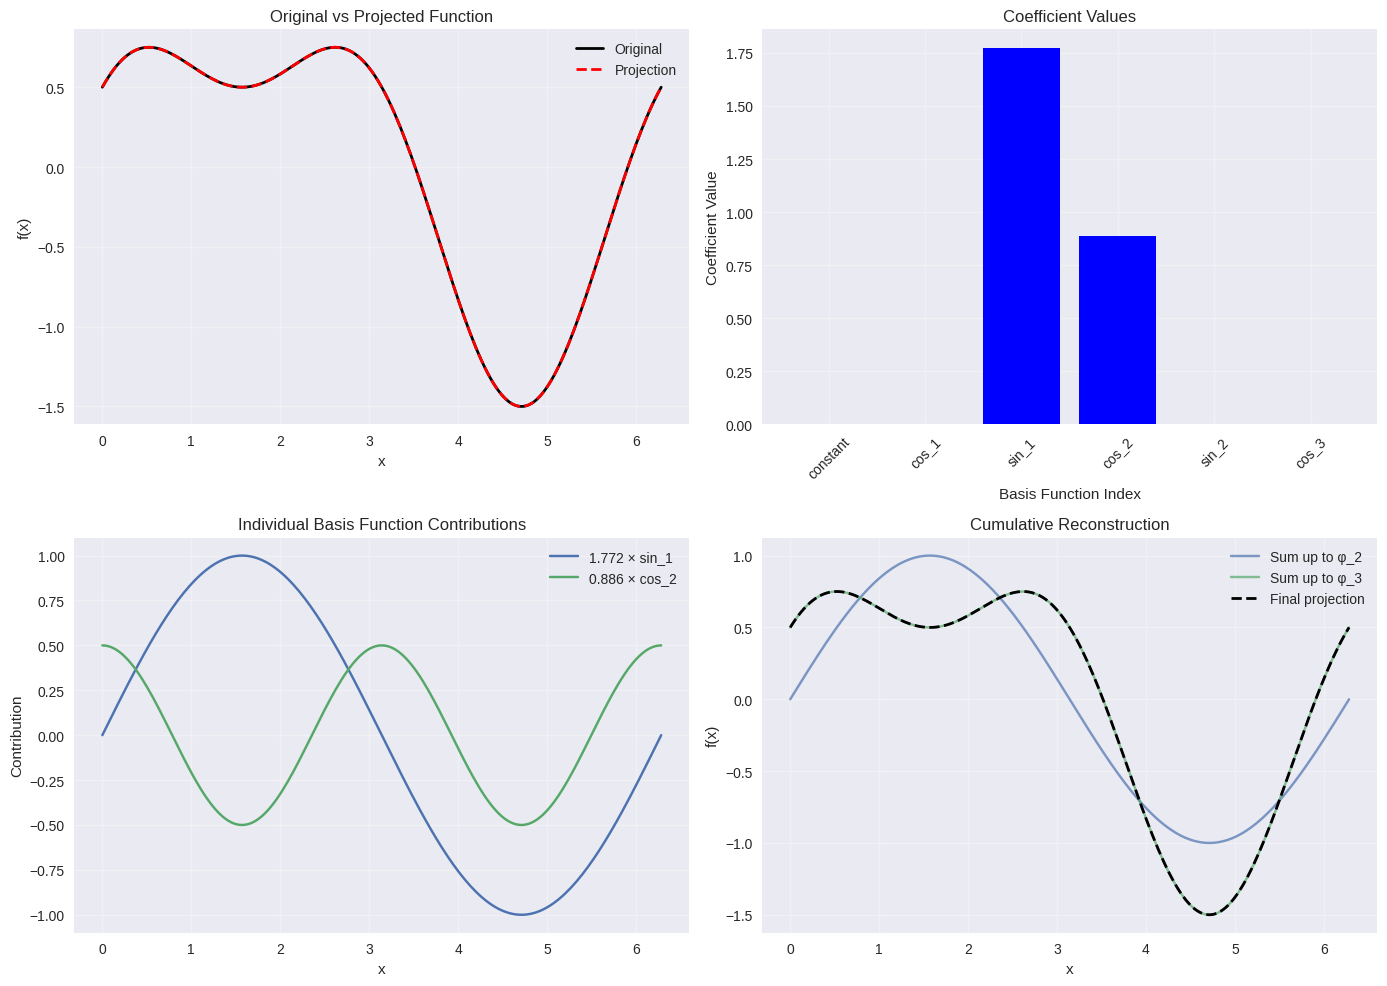


✓ Functions in L²spaces have dual representation:
  • As L2Function objects (evaluate at points)
  • As coefficient vectors (linear algebra)
✓ Perfect reconstruction guarantees mathematical consistency!


In [37]:
print("=== Coefficient Representation and Linear Algebra ===")
print()

# Create a small space for demonstration
domain = IntervalDomain(0, 2*np.pi)
space = L2Space(6, domain, basis_type='fourier')

# Define a simple function
def simple_func(x):
    return np.sin(x) + 0.5*np.cos(2*x)

print(f"Working with {space.dim}D Fourier space on [{space.function_domain.a}, {space.function_domain.b}]")
print()

# Project the function and get coefficients
projected_func = space.project(simple_func)
coefficients = space._to_components(projected_func)

print("Function projection and coefficient extraction:")
print(f"   Coefficient vector: {coefficients}")
print(f"   Coefficient shape: {coefficients.shape}")
print()

# Show which basis functions correspond to which coefficients
print("Coefficient breakdown:")
for i, coeff in enumerate(coefficients):
    basis_func = space.get_basis_function(i)
    print(f"   φ_{i} ({basis_func.name}): coefficient = {coeff:.6f}")

print()

# Reconstruct function from coefficients
reconstructed_func = space._from_components(coefficients)

# Verify reconstruction
x_test = np.linspace(0, 2*np.pi, 100)
y_original = np.array([projected_func.evaluate(xi) for xi in x_test])
y_reconstructed = np.array([reconstructed_func.evaluate(xi) for xi in x_test])

reconstruction_error = np.max(np.abs(y_original - y_reconstructed))
print(f"Reconstruction verification:")
print(f"   Max reconstruction error: {reconstruction_error:.2e}")
print(f"   Perfect reconstruction: {reconstruction_error < 1e-12}")

# Visualize the decomposition
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original and projected function
ax = axes[0, 0]
x_plot = np.linspace(0, 2*np.pi, 200)
y_true = simple_func(x_plot)
y_proj = np.array([projected_func.evaluate(xi) for xi in x_plot])

ax.plot(x_plot, y_true, 'k-', linewidth=2, label='Original')
ax.plot(x_plot, y_proj, 'r--', linewidth=2, label='Projection')
ax.set_title('Original vs Projected Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# Coefficient bar plot
ax = axes[0, 1]
basis_names = [space.get_basis_function(i).name for i in range(space.dim)]
bars = ax.bar(range(space.dim), coefficients, color=['red' if c < 0 else 'blue' for c in coefficients])
ax.set_title('Coefficient Values')
ax.set_xlabel('Basis Function Index')
ax.set_ylabel('Coefficient Value')
ax.set_xticks(range(space.dim))
ax.set_xticklabels(basis_names, rotation=45)
ax.grid(True, alpha=0.3)

# Individual basis function contributions
ax = axes[1, 0]
for i in range(min(4, space.dim)):
    if abs(coefficients[i]) > 1e-6:  # Only plot significant contributions
        basis_func = space.get_basis_function(i)
        y_basis = np.array([coefficients[i] * basis_func.evaluate(xi) for xi in x_plot])
        ax.plot(x_plot, y_basis, label=f'{coefficients[i]:.3f} × {basis_func.name}')

ax.set_title('Individual Basis Function Contributions')
ax.set_xlabel('x')
ax.set_ylabel('Contribution')
ax.grid(True, alpha=0.3)
ax.legend()

# Cumulative reconstruction
ax = axes[1, 1]
y_cumulative = np.zeros_like(x_plot)
significant_indices = [i for i in range(space.dim) if abs(coefficients[i]) > 1e-6]

for idx, i in enumerate(significant_indices):
    basis_func = space.get_basis_function(i)
    y_contribution = np.array([coefficients[i] * basis_func.evaluate(xi) for xi in x_plot])
    y_cumulative += y_contribution
    ax.plot(x_plot, y_cumulative, label=f'Sum up to φ_{i}', alpha=0.7)

ax.plot(x_plot, y_proj, 'k--', linewidth=2, label='Final projection')
ax.set_title('Cumulative Reconstruction')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print()
print("✓ Functions in L²spaces have dual representation:")
print("  • As L2Function objects (evaluate at points)")
print("  • As coefficient vectors (linear algebra)")
print("✓ Perfect reconstruction guarantees mathematical consistency!")

## 7. Lazy Basis Function Evaluation

L²Space uses lazy evaluation to create basis functions on-demand, improving memory efficiency for high-dimensional spaces.

In [38]:
print("=== Basis Function Management and Efficiency ===")
print()

# Create a large-dimensional space
domain = IntervalDomain(0, 2*np.pi)
large_space = L2Space(100, domain, basis_type='fourier')

print(f"Created large L²Space with dimension {large_space.dim}")
print()

# Show the basis function management
print("Basis function management:")
print(f"   Space dimension: {large_space.dim}")
print(f"   Basis functions type: {type(large_space.basis_functions)}")
print(f"   Number of basis functions available: {len(large_space.basis_functions)}")
print()

# Access some basis functions
print("Accessing individual basis functions:")
for i in [0, 10, 50, 99]:
    basis_func = large_space.get_basis_function(i)
    print(f"   Accessed φ_{i}: {basis_func.name}")

print()

# Demonstrate indexing and iteration interfaces
print("Interface demonstration:")
print(f"   Direct indexing: basis_functions[5] = {large_space.basis_functions[5].name}")
print(f"   Length: len(basis_functions) = {len(large_space.basis_functions)}")

print("   Iteration over first 5 basis functions:")
for i, basis_func in enumerate(large_space.basis_functions):
    if i >= 5:
        break
    print(f"     φ_{i}: {basis_func.name}")

print()

# Show memory efficiency for large spaces
print("Memory efficiency demonstration:")
small_space = L2Space(5, domain, basis_type='fourier')
medium_space = L2Space(25, domain, basis_type='fourier')

spaces = [
    ("Small", small_space),
    ("Medium", medium_space),
    ("Large", large_space)
]

for name, space in spaces:
    print(f"   {name} space: {space.dim} dimensions")
    sample_basis = space.get_basis_function(1)
    print(f"     Sample basis function: {sample_basis.name}")

print()
print("✓ Efficient basis function management for spaces of any size!")
print("✓ On-demand access to basis functions when needed!")

=== Basis Function Management and Efficiency ===

Created large L²Space with dimension 100

Basis function management:
   Space dimension: 100
   Basis functions type: <class 'list'>
   Number of basis functions available: 100

Accessing individual basis functions:
   Accessed φ_0: constant
   Accessed φ_10: sin_5
   Accessed φ_50: sin_25
   Accessed φ_99: cos_50

Interface demonstration:
   Direct indexing: basis_functions[5] = cos_3
   Length: len(basis_functions) = 100
   Iteration over first 5 basis functions:
     φ_0: constant
     φ_1: cos_1
     φ_2: sin_1
     φ_3: cos_2
     φ_4: sin_2

Memory efficiency demonstration:
   Small space: 5 dimensions
     Sample basis function: cos_1
   Medium space: 25 dimensions
     Sample basis function: cos_1
   Large space: 100 dimensions
     Sample basis function: cos_1

✓ Efficient basis function management for spaces of any size!
✓ On-demand access to basis functions when needed!


## 8. Domain Integration and Mathematical Consistency

The IntervalDomain interface ensures mathematical consistency between domain properties and function space behavior.

=== Domain Integration and Mathematical Consistency ===

Domain-Function Space Integration:
   Domain: [-2.0, 3.0]
   Domain name: Custom Domain
   Domain length: 5.0
   Domain center: 0.5
   Domain interval: [-2.0, 3.0]

Function evaluation consistency:
   x=-2.0: in domain=True, f(x)= 0.0000
   x= 0.5: in domain=True, f(x)= 0.0000
   x= 3.0: in domain=True, f(x)=-0.0000

Integration consistency between domain and function space:
   Direct domain integration: -0.000000
   Function space integration: -0.000000
   Difference: 5.19e-11

Domain operations and L²Space properties:
   Original domain: [-2.0, 3.0]
   Subdomain: [-1.0, 2.0]
   Original space: dim=8
   Subspace: dim=6

Different domains with same basis type:
   Unit Interval: length=1.000, space dim=4
   2π Interval: length=6.283, space dim=4
   Symmetric Interval: length=2.000, space dim=4



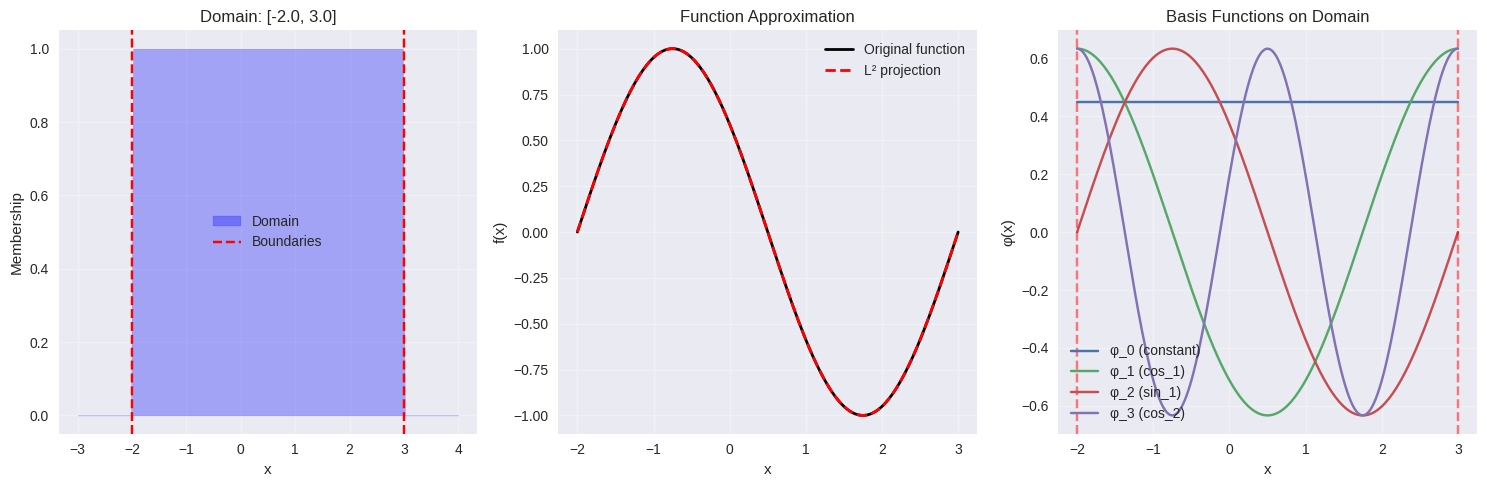


✓ L²Spaces provide clean function approximation on interval domains!
✓ Domain properties (length, center) are fully integrated!
✓ For boundary conditions, use SobolevSpace for PDE applications!


In [39]:
print("=== Domain Integration and Mathematical Consistency ===")
print()

# Create a domain with specific properties
domain = IntervalDomain(-2, 3, name="Custom Domain")
space = L2Space(8, domain, basis_type='fourier')

print("Domain-Function Space Integration:")
print(f"   Domain: {space.function_domain}")
print(f"   Domain name: {space.function_domain.name}")
print(f"   Domain length: {space.function_domain.length}")
print(f"   Domain center: {space.function_domain.center}")
print(f"   Domain interval: [{space.function_domain.a}, {space.function_domain.b}]")
print()

# Test function evaluation using domain properties
def test_function(x):
    return np.sin(2*np.pi*(x - domain.a)/domain.length)

print("Function evaluation consistency:")
test_points = [domain.a, domain.center, domain.b]
for x in test_points:
    domain_contains = domain.contains(x)
    func_value = test_function(x)
    print(f"   x={x:4.1f}: in domain={domain_contains}, f(x)={func_value:7.4f}")

print()

# Integration consistency
print("Integration consistency between domain and function space:")

# Direct domain integration
domain_integral = domain.integrate(test_function)
print(f"   Direct domain integration: {domain_integral:.6f}")

# Function space projection and integration
projected_func = space.project(test_function)
space_integral = projected_func.integrate()
print(f"   Function space integration: {space_integral:.6f}")
print(f"   Difference: {abs(domain_integral - space_integral):.2e}")

print()

# Domain operations and function spaces
print("Domain operations and L²Space properties:")

# Create subdomain
subdomain_a, subdomain_b = -1, 2
subdomain = IntervalDomain(subdomain_a, subdomain_b, name="Subdomain")
subspace = L2Space(6, subdomain, basis_type='fourier')

print(f"   Original domain: {domain}")
print(f"   Subdomain: {subdomain}")
print(f"   Original space: dim={space.dim}")
print(f"   Subspace: dim={subspace.dim}")

print()

# Different domains with same basis type
print("Different domains with same basis type:")
domains_list = [
    IntervalDomain(0, 1, name="Unit Interval"),
    IntervalDomain(0, 2*np.pi, name="2π Interval"),
    IntervalDomain(-1, 1, name="Symmetric Interval"),
]

for test_domain in domains_list:
    test_space = L2Space(4, test_domain, basis_type='fourier')
    print(f"   {test_domain.name}: length={test_domain.length:.3f}, space dim={test_space.dim}")

print()

# Visualize domain-function space relationship
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Domain visualization
ax = axes[0]
x_domain = np.linspace(domain.a - 1, domain.b + 1, 200)
in_domain = domain.contains(x_domain)
ax.fill_between(x_domain, 0, in_domain, alpha=0.3, color='blue', label='Domain')
ax.axvline(domain.a, color='red', linestyle='--', label='Boundaries')
ax.axvline(domain.b, color='red', linestyle='--')
ax.set_title(f'Domain: {domain}')
ax.set_xlabel('x')
ax.set_ylabel('Membership')
ax.legend()
ax.grid(True, alpha=0.3)

# Function and its projection
ax = axes[1]
x_func = np.linspace(domain.a, domain.b, 200)
y_true = test_function(x_func)
y_proj = np.array([projected_func.evaluate(xi) for xi in x_func])

ax.plot(x_func, y_true, 'k-', linewidth=2, label='Original function')
ax.plot(x_func, y_proj, 'r--', linewidth=2, label='L² projection')
ax.set_title('Function Approximation')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True, alpha=0.3)

# Basis functions on domain
ax = axes[2]
for i in range(min(4, space.dim)):
    basis_func = space.get_basis_function(i)
    y_basis = np.array([basis_func.evaluate(xi) for xi in x_func])
    ax.plot(x_func, y_basis, label=f'φ_{i} ({basis_func.name})')

ax.axvline(domain.a, color='red', linestyle='--', alpha=0.5)
ax.axvline(domain.b, color='red', linestyle='--', alpha=0.5)
ax.set_title('Basis Functions on Domain')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("✓ L²Spaces provide clean function approximation on interval domains!")
print("✓ Domain properties (length, center) are fully integrated!")
print("✓ For boundary conditions, use SobolevSpace for PDE applications!")